In [1]:
from sklearn import tree
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')

In [3]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


<AxesSubplot:xlabel='smoker', ylabel='count'>

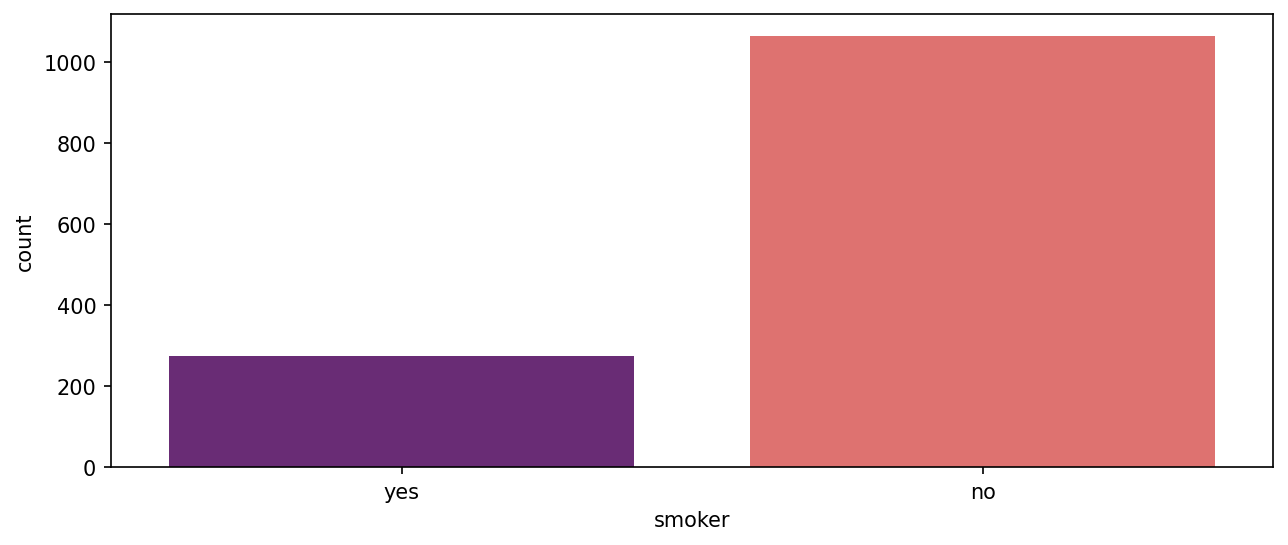

In [4]:
plt.figure(figsize = (10, 4), dpi = 150)
sns.countplot(data = df, x = 'smoker', palette='magma')

In [5]:
df = df.replace(['no', 'yes'], [0, 1])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 73.3+ KB


In [7]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,southwest,16884.92400
1,18,male,33.770,1,0,southeast,1725.55230
2,28,male,33.000,3,0,southeast,4449.46200
3,33,male,22.705,0,0,northwest,21984.47061
4,32,male,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,0,northwest,10600.54830
1334,18,female,31.920,0,0,northeast,2205.98080
1335,18,female,36.850,0,0,southeast,1629.83350
1336,21,female,25.800,0,0,southwest,2007.94500


In [8]:
X = df.drop('smoker', axis=1)

In [9]:
X = pd.get_dummies(X)

In [10]:
X

,age,bmi,children,charges,sex_female,sex_male,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,0,0,1
1,18,33.770,1,1725.55230,0,1,0,0,1,0
2,28,33.000,3,4449.46200,0,1,0,0,1,0
3,33,22.705,0,21984.47061,0,1,0,1,0,0
4,32,28.880,0,3866.85520,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,0,0,0,1


In [11]:
y = df.smoker

In [12]:
y

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1338, dtype: int64

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [14]:
clf = tree.DecisionTreeClassifier()

In [15]:
y_train

729     0
6       0
983     0
1107    0
769     0
       ..
1097    0
308     0
1080    0
1252    1
727     1
Name: smoker, Length: 896, dtype: int64

In [16]:
from sklearn.model_selection import GridSearchCV

In [17]:
parametrs = {'criterion' : ['gini', 'entropy'], 'max_depth': range(1, 50)}

In [18]:
grid_search_cv_clf = GridSearchCV(clf, parametrs, cv=5)

In [19]:
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 50)})

In [20]:
grid_search_cv_clf.best_params_

{'criterion': 'gini', 'max_depth': 4}

In [21]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [22]:
y_pred = grid_search_cv_clf.predict(X_test)

In [23]:
accuracy_score(y_test, y_pred)

0.9615384615384616

In [24]:
precision_score(y_test, y_pred)

0.875

In [25]:
recall_score(y_test, y_pred)

0.9438202247191011

In [26]:
f1_score(y_test, y_pred)

0.908108108108108